In [ ]:
# Clean Water Access vs Poverty Rates Hypothesis Testing
# Hypothesis: Countries with higher access to clean drinking water have lower poverty rates

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [ ]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
# Loading Dataset
df = pd.read_csv('/content/Water Hypo Test.csv')

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of countries/observations: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")
print("\nFirst few rows of the dataset:")
display(df.head())

Dataset Overview:
Number of countries/observations: 200
Number of variables: 7

First few rows of the dataset:


,country_code,year,Water_BasicDrinkingServices_PercentofPop,Water_SafelyManagedDrinkingServices_PercentofPop,Water_BasicHandwashing_PercentofPop,Poverty_HeadcountRatio_NationalPovertyLines_Percent,Poverty_HeadcountRatio_SocietalPovertyLines_Percent
0,AUS,2019,99.969854,NaN,NaN,NaN,NaN
1,AUS,2020,99.969818,NaN,NaN,NaN,NaN
2,AUS,2021,99.969775,NaN,NaN,NaN,NaN
3,AUS,2022,99.969731,NaN,NaN,NaN,NaN
4,AUS,2023,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())


Missing values in each column:


,0
country_code,0
year,0
Water_BasicDrinkingServices_PercentofPop,40
Water_SafelyManagedDrinkingServices_PercentofPop,72
Water_BasicHandwashing_PercentofPop,168
Poverty_HeadcountRatio_NationalPovertyLines_Percent,132
Poverty_HeadcountRatio_SocietalPovertyLines_Percent,110


In [ ]:
# Fill missing values with median for numerical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
        print(f"Filled missing values in {col} with median")

Filled missing values in Water_BasicDrinkingServices_PercentofPop with median
Filled missing values in Water_SafelyManagedDrinkingServices_PercentofPop with median
Filled missing values in Water_BasicHandwashing_PercentofPop with median
Filled missing values in Poverty_HeadcountRatio_NationalPovertyLines_Percent with median
Filled missing values in Poverty_HeadcountRatio_SocietalPovertyLines_Percent with median


In [ ]:
# Basic Statistical Summary
print("\nStatistical summary of the data:")
display(df.describe())



Statistical summary of the data:


,year,Water_BasicDrinkingServices_PercentofPop,Water_SafelyManagedDrinkingServices_PercentofPop,Water_BasicHandwashing_PercentofPop,Poverty_HeadcountRatio_NationalPovertyLines_Percent,Poverty_HeadcountRatio_SocietalPovertyLines_Percent
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2021.000000,98.707647,93.434815,84.734527,13.894000,16.558000
std,1.417762,2.426455,15.088302,5.150654,3.849272,4.424073
min,2019.000000,90.190650,29.433917,44.244824,0.000000,5.900000
25%,2020.000000,98.767729,97.280715,84.980460,13.650000,16.550000
50%,2021.000000,99.864081,98.887982,84.980460,13.650000,16.550000
75%,2022.000000,99.999998,99.149239,84.980460,13.650000,16.550000
max,2023.000000,100.000000,100.000000,94.923205,43.900000,34.800000



Visualizing relationships between water access and poverty variables:


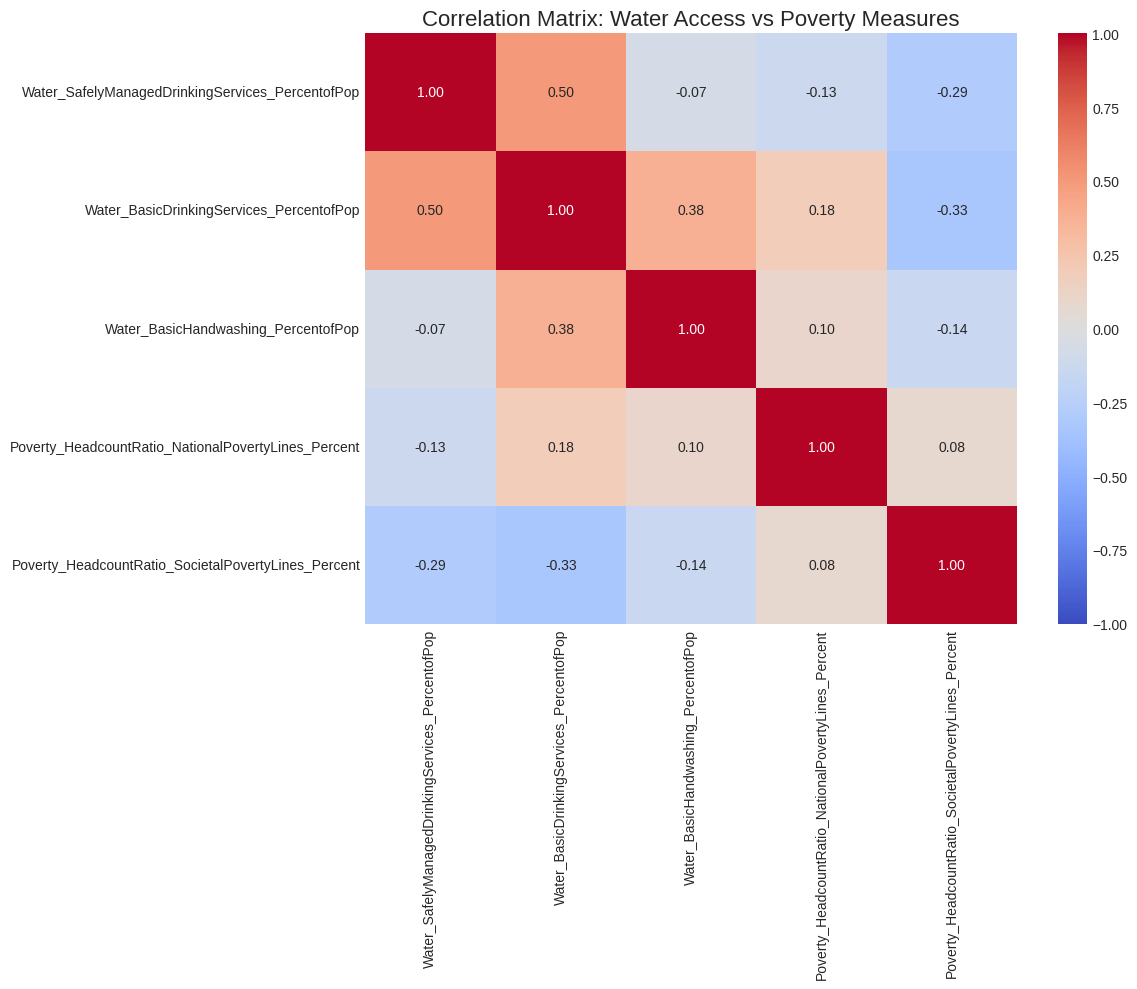

In [ ]:
# Visualize relationships between water access and poverty variables
print("\nVisualizing relationships between water access and poverty variables:")

# Create a correlation matrix
water_poverty_cols = [
    'Water_SafelyManagedDrinkingServices_PercentofPop',
    'Water_BasicDrinkingServices_PercentofPop',
    'Water_BasicHandwashing_PercentofPop',
    'Poverty_HeadcountRatio_NationalPovertyLines_Percent',
    'Poverty_HeadcountRatio_SocietalPovertyLines_Percent'
]

corr_matrix = df[water_poverty_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix: Water Access vs Poverty Measures', fontsize=16)
plt.tight_layout()
plt.show()

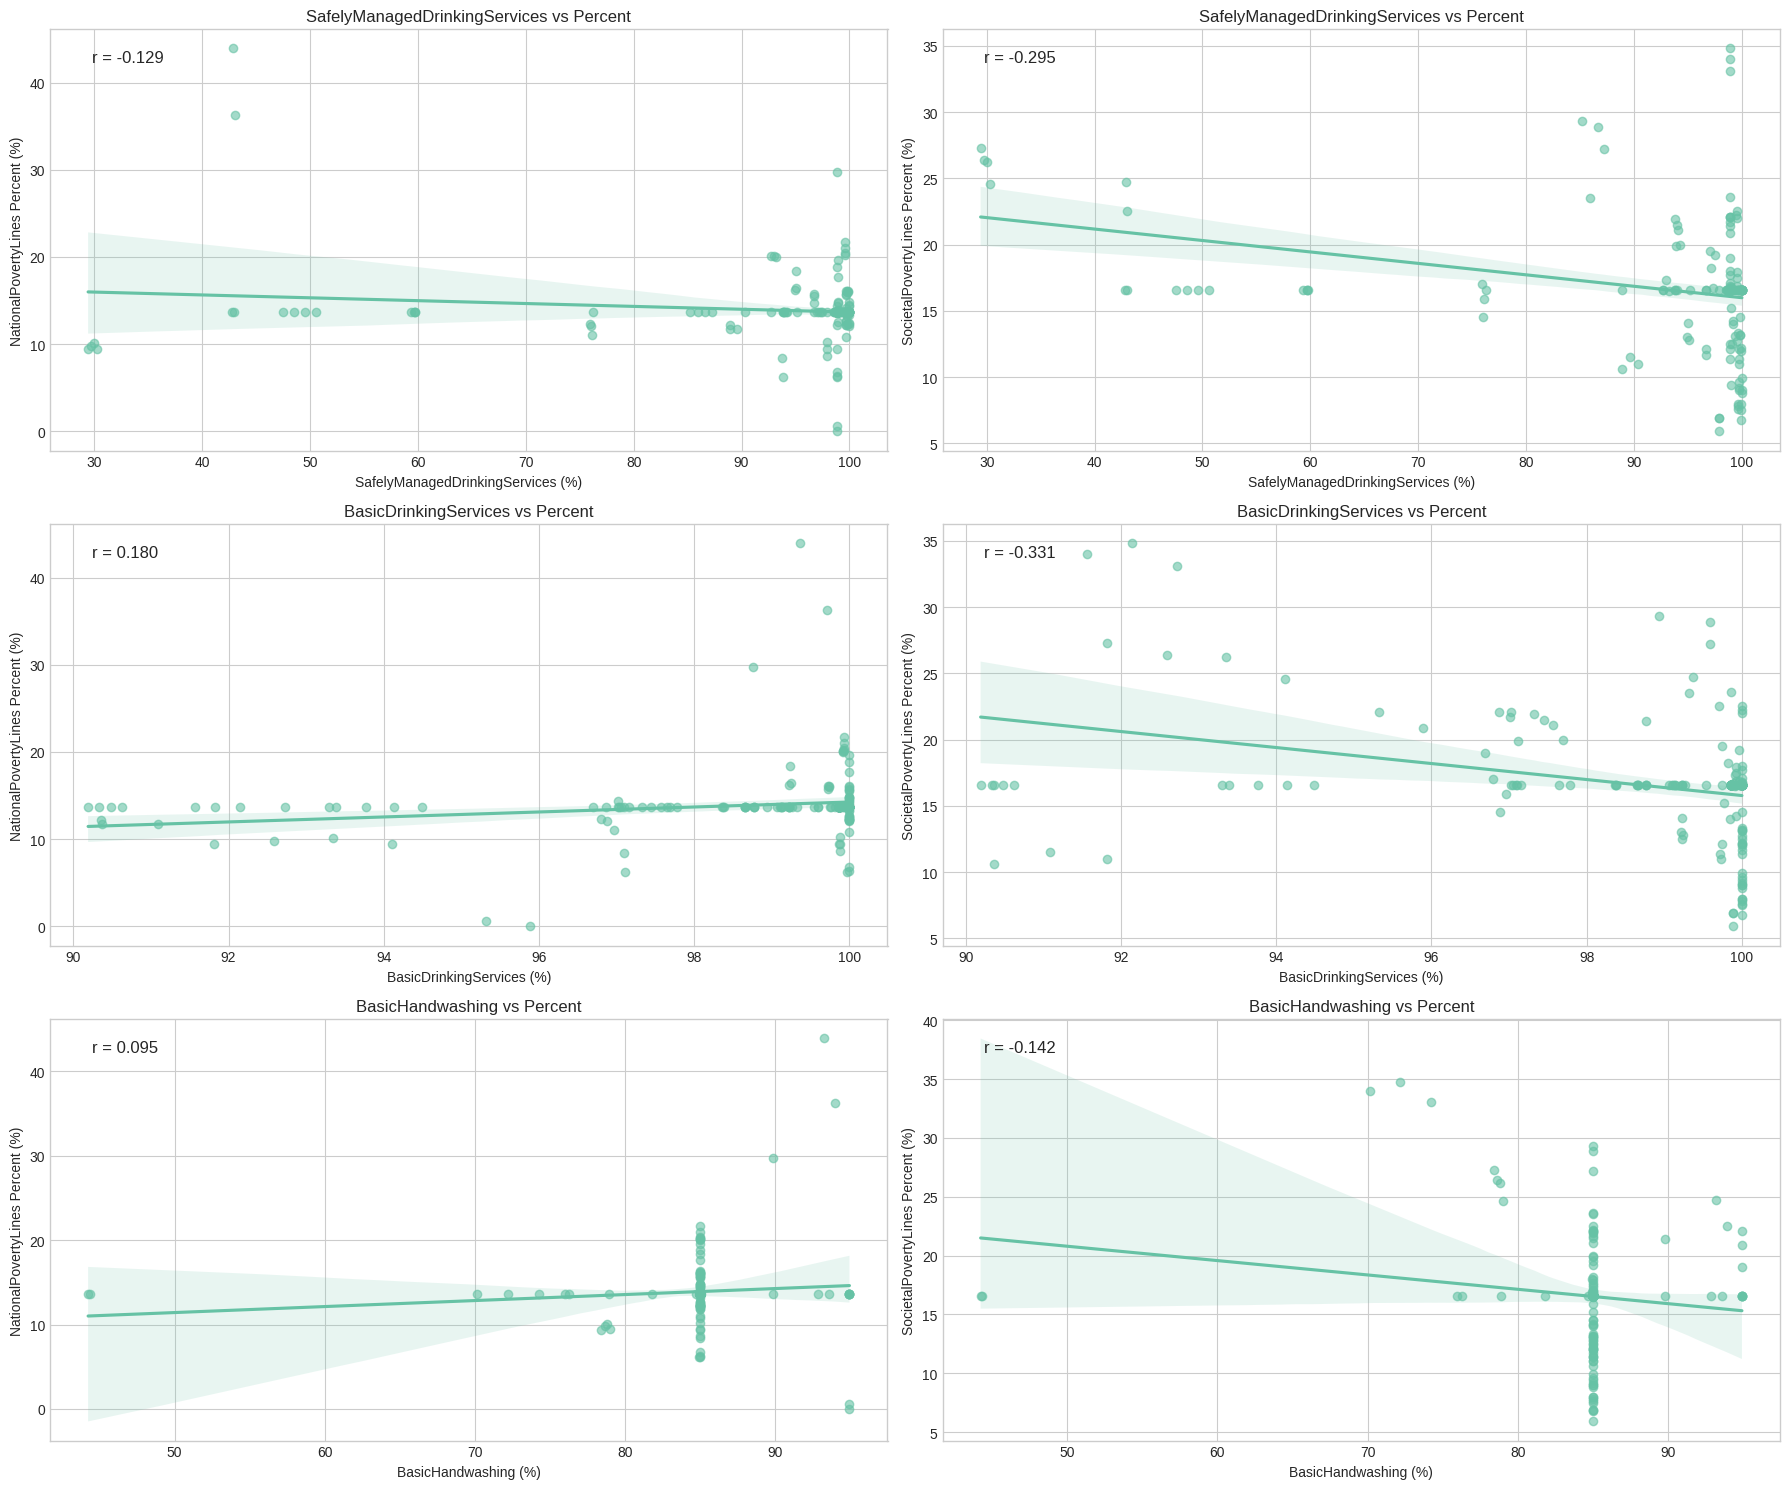

In [ ]:
#Scatter plots with regression lines to visualize relationships
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

water_vars = [
    'Water_SafelyManagedDrinkingServices_PercentofPop',
    'Water_BasicDrinkingServices_PercentofPop',
    'Water_BasicHandwashing_PercentofPop'
]
poverty_vars = [
    'Poverty_HeadcountRatio_NationalPovertyLines_Percent',
    'Poverty_HeadcountRatio_SocietalPovertyLines_Percent'
]

plot_idx = 0
for water_var in water_vars:
    for poverty_var in poverty_vars:
        if plot_idx < len(axes):
            sns.regplot(
                x=water_var,
                y=poverty_var,
                data=df,
                scatter_kws={'alpha':0.6},
                ax=axes[plot_idx]
            )
            axes[plot_idx].set_title(f"{water_var.split('_')[1]} vs {poverty_var.split('_')[-1]}", fontsize=12)
            axes[plot_idx].set_xlabel(f"{' '.join(water_var.split('_')[1:-1])} (%)")
            axes[plot_idx].set_ylabel(f"{' '.join(poverty_var.split('_')[-2:])} (%)")

            # Calculate and display correlation coefficient
            corr_coef = df[water_var].corr(df[poverty_var])
            axes[plot_idx].annotate(f"r = {corr_coef:.3f}", xy=(0.05, 0.95), xycoords='axes fraction',
                                   fontsize=12, ha='left', va='top')
            plot_idx += 1

plt.tight_layout()
plt.show()


Hypothesis Testing - Approach 1: Comparing high vs low water access countries
Median Water_SafelyManagedDrinkingServices_PercentofPop: 98.89%
Number of countries in high access group: 136
Number of countries in low access group: 64

Comparison for Poverty_HeadcountRatio_NationalPovertyLines_Percent:
High water access group mean: 13.72%
Low water access group mean: 14.26%
Difference: -0.54%
T-statistic: -0.754
P-value: 0.4533
Result: There is NO statistically significant difference in poverty rates between high and low water access countries.


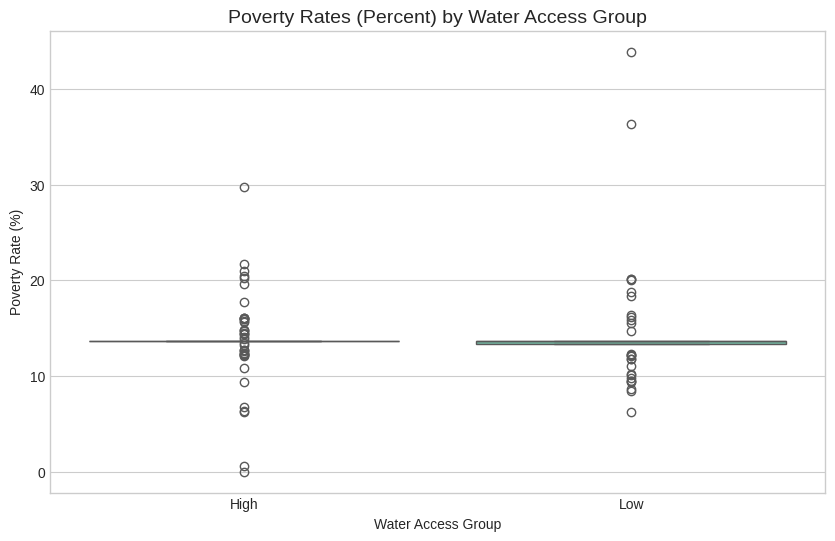


Comparison for Poverty_HeadcountRatio_SocietalPovertyLines_Percent:
High water access group mean: 16.14%
Low water access group mean: 17.44%
Difference: -1.30%
T-statistic: -1.852
P-value: 0.0668
Result: There is NO statistically significant difference in poverty rates between high and low water access countries.


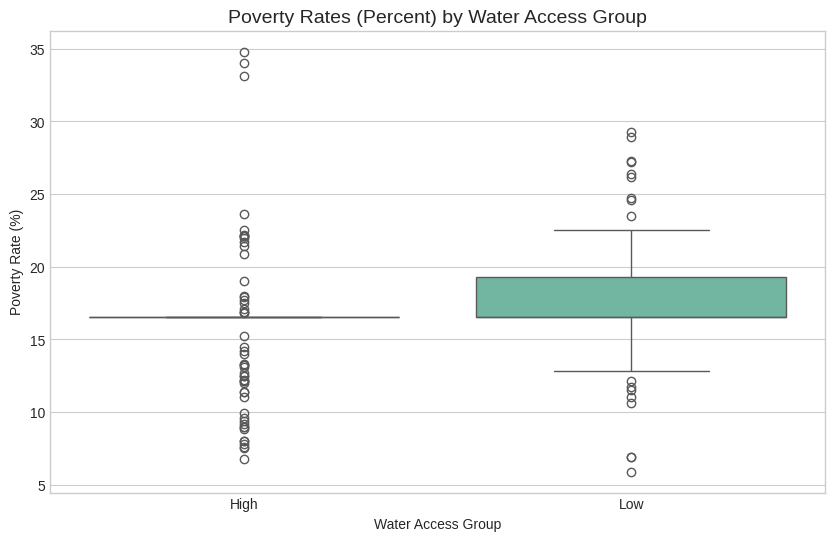

In [ ]:
# Splitting countries into high and low water access groups
print("\nHypothesis Testing - Approach 1: Comparing high vs low water access countries")

# Focus on safely managed drinking water as our primary measure
water_var = 'Water_SafelyManagedDrinkingServices_PercentofPop'

# Define high and low water access groups (using median split)
water_median = df[water_var].median()
df['water_access_group'] = df[water_var].apply(lambda x: 'High' if x >= water_median else 'Low')

print(f"Median {water_var}: {water_median:.2f}%")
print(f"Number of countries in high access group: {sum(df['water_access_group'] == 'High')}")
print(f"Number of countries in low access group: {sum(df['water_access_group'] == 'Low')}")

# Perform t-tests for both poverty measures
for poverty_var in poverty_vars:
    # Get the data for each group
    high_access = df[df['water_access_group'] == 'High'][poverty_var].dropna()
    low_access = df[df['water_access_group'] == 'Low'][poverty_var].dropna()

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(high_access, low_access, equal_var=False)

    # Calculate means
    high_mean = high_access.mean()
    low_mean = low_access.mean()

    # Print results
    print(f"\nComparison for {poverty_var}:")
    print(f"High water access group mean: {high_mean:.2f}%")
    print(f"Low water access group mean: {low_mean:.2f}%")
    print(f"Difference: {high_mean - low_mean:.2f}%")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Result: There is a statistically significant difference in poverty rates between high and low water access countries.")
        if high_mean < low_mean:
            print("Countries with higher water access have LOWER poverty rates.")
        else:
            print("Countries with higher water access have HIGHER poverty rates.")
    else:
        print("Result: There is NO statistically significant difference in poverty rates between high and low water access countries.")

    # Visualize the comparison with box plots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='water_access_group', y=poverty_var, data=df)
    plt.title(f'Poverty Rates ({poverty_var.split("_")[-1]}) by Water Access Group', fontsize=14)
    plt.xlabel('Water Access Group')
    plt.ylabel('Poverty Rate (%)')
    plt.show()

In [ ]:
#convert ipynb file to html

!jupyter nbconvert --to html "RP_Hypo_Test_Version_2.ipynb"

[NbConvertApp] Converting notebook RP_Hypo_Test_Version_2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 839748 bytes to RP_Hypo_Test_Version_2.html
